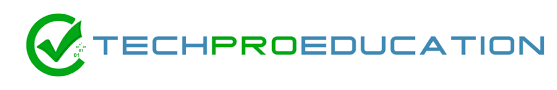

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Table of Contents:
* [Goals](#goals)
* [Determines](#determines)
* [Data Preprocessing](#predata)
    * [Importing the Libraries](#library)
    * [Reading and Viewing the Dataset](#dataset)
    * [Detecting Missing Values and Duplicates](#nan)
* [Feature Engineering](#feature)
    * [Season Name Column Added](#season)
    * [Extract New Columns](#columns)
* [Data Visulization](#visulization)
    * [Weather Counts](#weather_counts)
    * [Histplot of Discrete Features](#discrete)
    * [Correlation via Heatmap](#correlation)
    * [Barplot with Correlation](#barplotwcorr)
    * [Over Time Bike Shares](#ovtibish)
    * [Bike Shares Monthly](#bishbyti)
    * [Bike Shares Hourly](#bishhr)
    * [Bike Shares Day of a Week](#isholiday)
    * [Bike Shares Day of a Month](#bishdyofamo)
    * [Bike Shares by Year](#bishbyye)
    * [Distribution of Bike Shares](#distofbs)
    * [Distribution of Weather Code by Seasons](#distofwcs)
* [Conclusions](#conclusions)

## <span style=" color:red" id="goals">Goal 
    
<span style = "color:Pink">---> To determine the factors that increase or decrease bike shares <--


## <span style=" color:red" id="determines">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    


## <span style=" color:Green" id="predata">Data Preprocessing

<div class="alert alert-warning alert-info" id="library">
<span style=" color:red">1. Import Libraries
</span>

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import warnings ;
#warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info" id="dataset">
<span style=" color:red">2. Read Dataset
</span>

In [3]:
df = pd.read_csv(r"C:\Users\EmincanY\Desktop\GitHub\EDA\Data_Visulization\DataVis-CapStoneProject\store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info" id = "nan">
<span style=" color:red">3. Check missing values and if there are any duplicate rows or not.
</span>

In [4]:
df.isnull().sum() # There is no any nan value.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.drop_duplicates() # There is no duplicate rows. No one dropped.

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


## <span style=" color:Green" id="feature">Feature Engineering

<div class="alert alert-warning alert-info">
<span style=" color:red">1. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [6]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
df["timestamp"] = df.timestamp.astype("datetime64")  #df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M')  
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
df.set_index("timestamp" , inplace = True ) # We set new index with timestamp column.

<div class="alert alert-warning alert-info" >
<span style=" color:red" id="season">2. Add season_name Feature
</span>


In [10]:
mapping = {0.0 : "Spring" , 1.0 : "Summer" , 2.0 : "Fall" , 3.0 : "Winter"}
df["season_name"] = df.season.map(mapping) # We created season_name column to better graphs.


In [11]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter


<div class="alert alert-warning alert-info" >
<span style=" color:red" id="columns">3. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [12]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

In [13]:
df['dayofweek_num'] = df.index.dayofweek
df['dayofweek_name'] = df.index.day_name()
df["dayofmonth_num"] = df.index.strftime("%d")

In [14]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,04
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,04
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,04
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,04
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,04


In [15]:
df.dayofmonth_num = df.dayofmonth_num.astype("int64")

## <span style=" color:Green" id="visulization">Data Visulization

<div class="alert alert-warning alert-info">
<span style=" color:red" id="weather_counts">1. Weather Counts
</span>

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

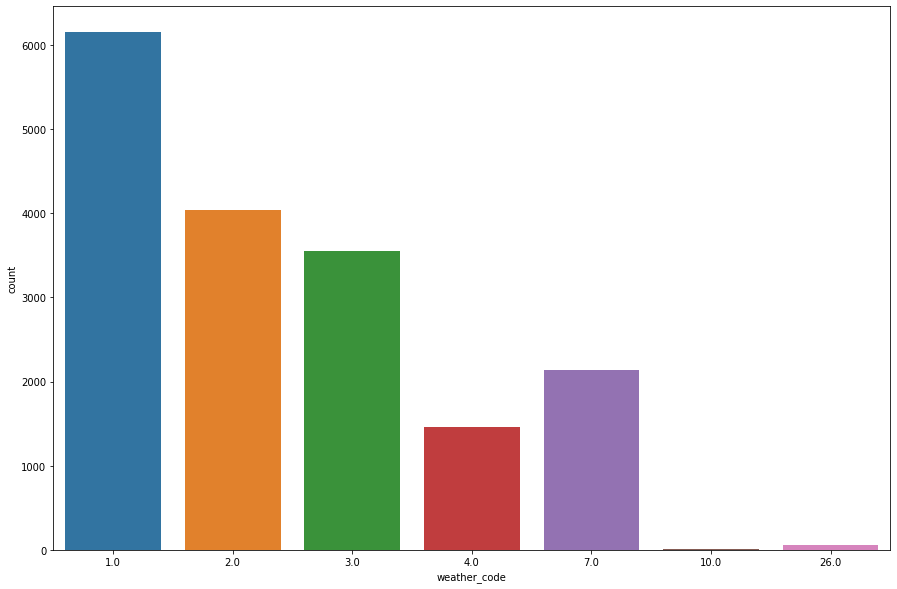

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x='weather_code',data=df);

<div class="alert alert-warning alert-info">
<span style=" color:red" id="discrete">2. Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)
</span>


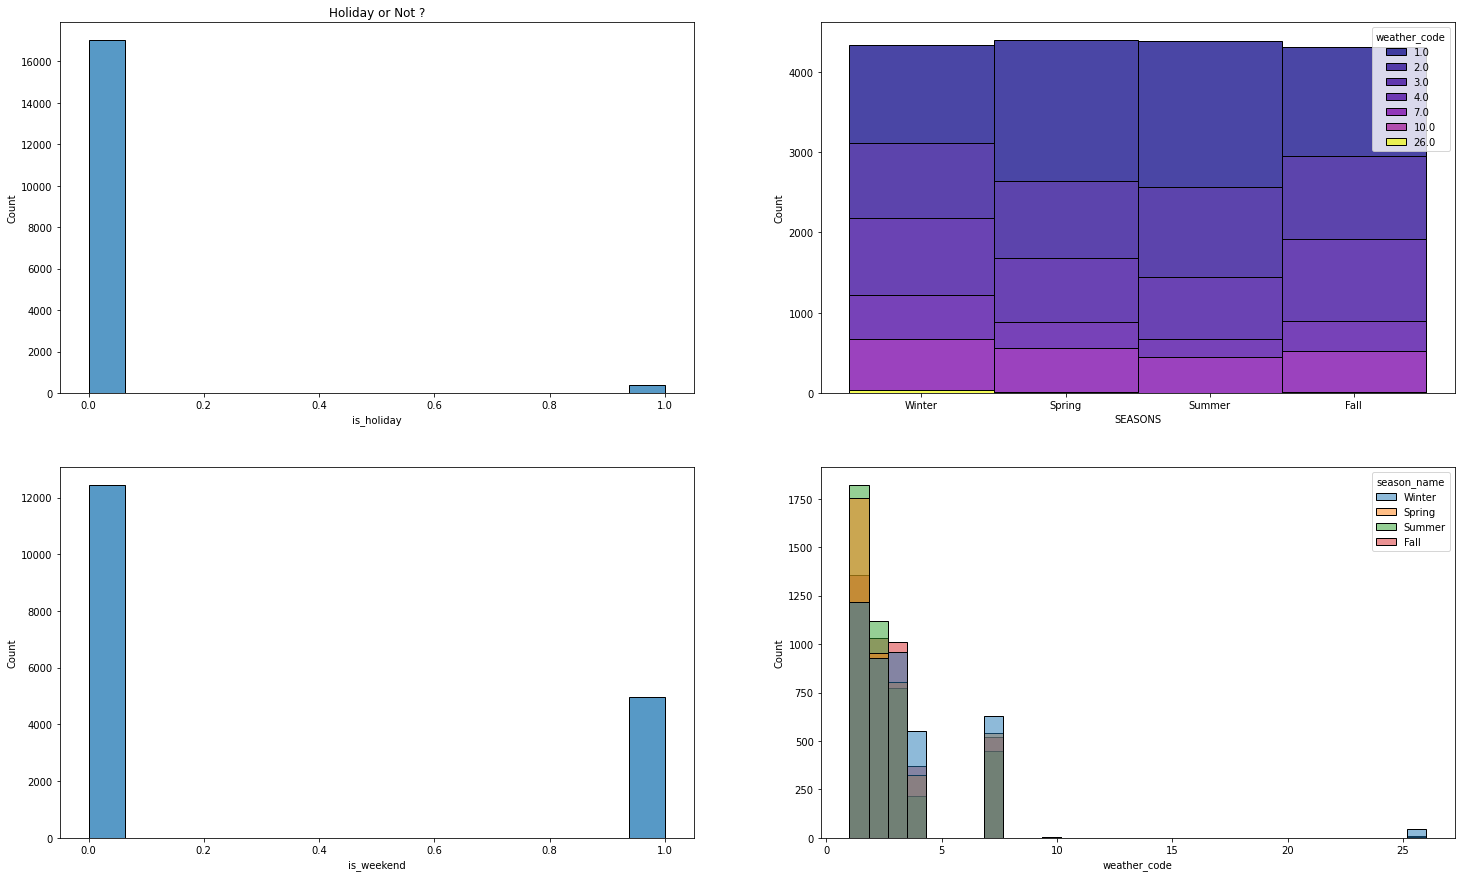

In [17]:

fig, ax = plt.subplots(2,2 , figsize = (25,15))


a = sns.histplot(ax = ax[0][0] , data = df , x = "is_holiday" )
a.set_title("Holiday or Not ?") # Değişkene atayım set yap.

b = sns.histplot(data = df , x = "season_name" , ax = ax[0][1] , hue = "weather_code", palette="plasma" , stat = "count" , multiple="stack")
b.set_xlabel("SEASONS")

#c = sns.histplot(x = df["is_weekend"] , ax = ax[1][0] , hue = df["weather_code"] )
c = sns.histplot( x = df["is_weekend"] , ax = ax[1][0])
d = sns.histplot(x = df["weather_code"] , ax = ax[1][1] , bins = 30 , hue = df["season_name"] );



<div class="alert alert-warning alert-info">
<span style=" color:red" id="correlation">3. Visualize the correlation with a heatmap
</span>

In [18]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


In [19]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num,dayofmonth_num
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,0.324423,-0.068688,-0.017887
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,0.168708,-0.002317,0.005072
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,0.153956,-0.006824,0.006791
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,-0.295653,0.011556,-0.020868
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.141792,0.001708,0.002040
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,-0.041786,0.020619,0.001904
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.000288,-0.144628,0.042657
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.001803,0.791975,0.005721
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.000006,0.002356,-0.006460
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,0.000542,-0.002876,-0.021935


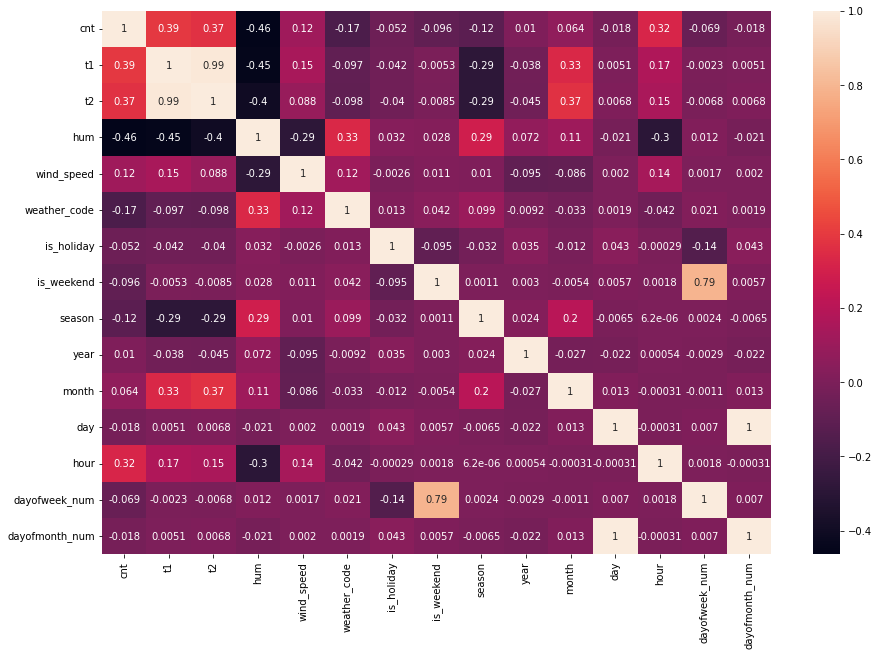

In [20]:
from matplotlib.pyplot import annotate


plt.figure(figsize= (15,10))

sns.heatmap(df.corr() , annot = True);

<div class="alert alert-warning alert-info">
<span style=" color:red" id="barplotwcorr" >4. Visualize the correlation of the target variable and the other features with barplot
</span>

In [21]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num,dayofmonth_num
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,0.324423,-0.068688,-0.017887
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,0.168708,-0.002317,0.005072
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,0.153956,-0.006824,0.006791
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,-0.295653,0.011556,-0.020868
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.141792,0.001708,0.002040
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,-0.041786,0.020619,0.001904
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.000288,-0.144628,0.042657
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.001803,0.791975,0.005721
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.000006,0.002356,-0.006460
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,0.000542,-0.002876,-0.021935


In [22]:
df.corr()[df.corr() > 0.2]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num,dayofmonth_num
cnt,1.000000,0.388798,0.369035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324423,NaN,NaN
t1,0.388798,1.000000,0.988344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332712,NaN,NaN,NaN,NaN
t2,0.369035,0.988344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368366,NaN,NaN,NaN,NaN
hum,NaN,NaN,NaN,1.000000,NaN,0.33475,NaN,NaN,0.290381,NaN,NaN,NaN,NaN,NaN,NaN
wind_speed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_code,NaN,NaN,NaN,0.334750,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.791975,NaN
season,NaN,NaN,NaN,0.290381,NaN,NaN,NaN,NaN,1.000000,NaN,0.203249,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


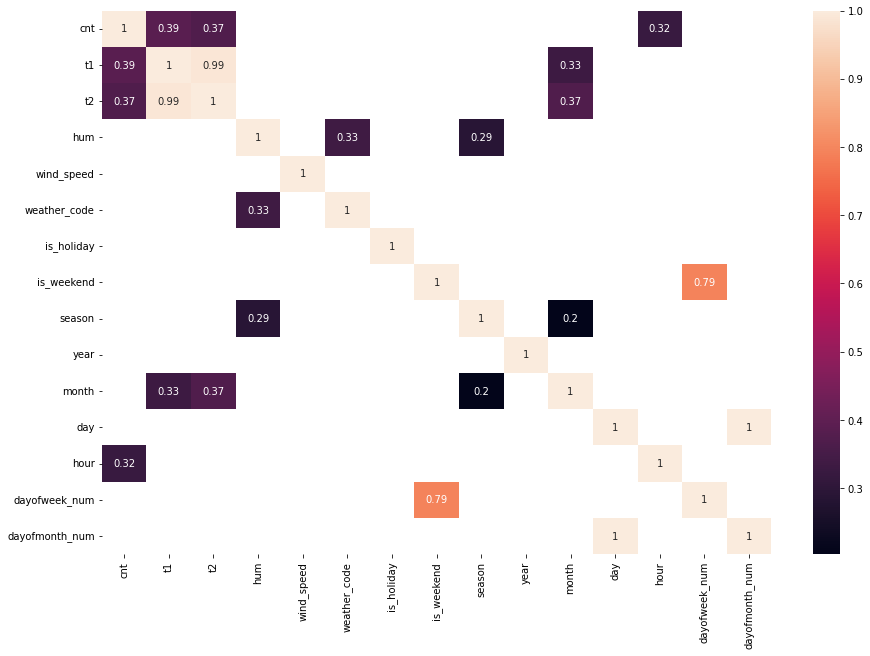

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()[df.corr() > 0.2] , annot = True);

In [24]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


In [25]:
df.corr().cnt.index # This will be x axis.

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year', 'month', 'day', 'hour', 'dayofweek_num',
       'dayofmonth_num'],
      dtype='object')

In [26]:
df.corr()["cnt"]# This will be y axis.


cnt               1.000000
t1                0.388798
t2                0.369035
hum              -0.462901
wind_speed        0.116295
weather_code     -0.166633
is_holiday       -0.051698
is_weekend       -0.096499
season           -0.116180
year              0.010046
month             0.063757
day              -0.017887
hour              0.324423
dayofweek_num    -0.068688
dayofmonth_num   -0.017887
Name: cnt, dtype: float64

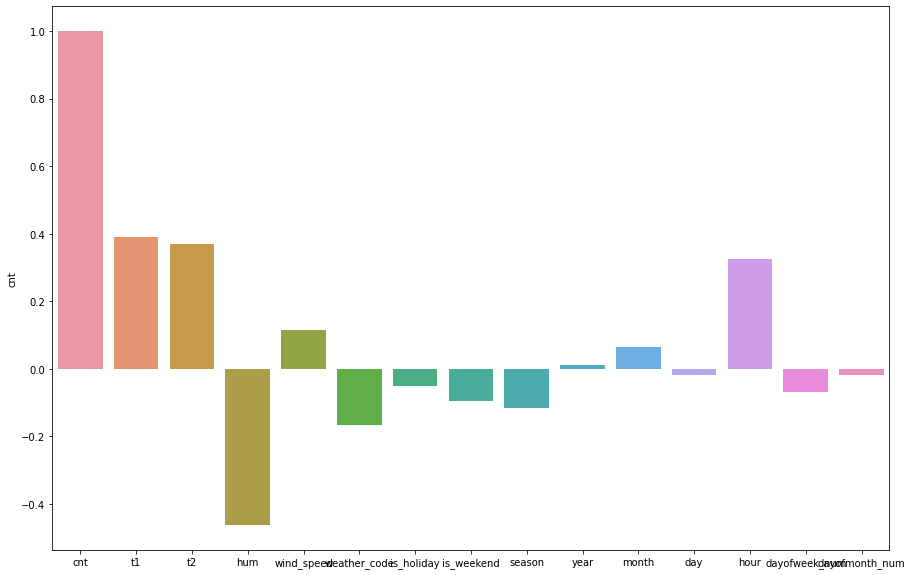

In [27]:
plt.figure(figsize=(15,10))

sns.barplot(x = df.corr().cnt.index , y = df.corr().cnt );

<div class="alert alert-warning alert-info">
<span style=" color:red" id= "ovtibish" >5. Plot bike shares over time use lineplot.
</span>

In [28]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


In [29]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

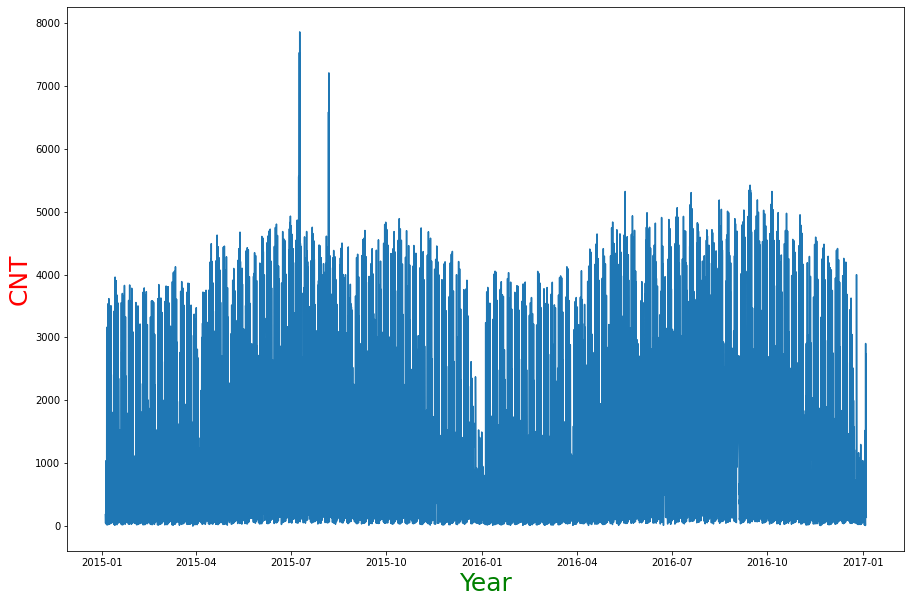

In [30]:
from turtle import color


plt.figure(figsize=(15,10));

sns.lineplot(x = df.index , y =df["cnt"]);

plt.xlabel("Year" , fontsize = 25 , color = "green");
plt.ylabel("CNT" , fontsize = 25 , color = "red");


<div class="alert alert-warning alert-info">
<span style=" color:red" id="bishbyti" >6. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [31]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


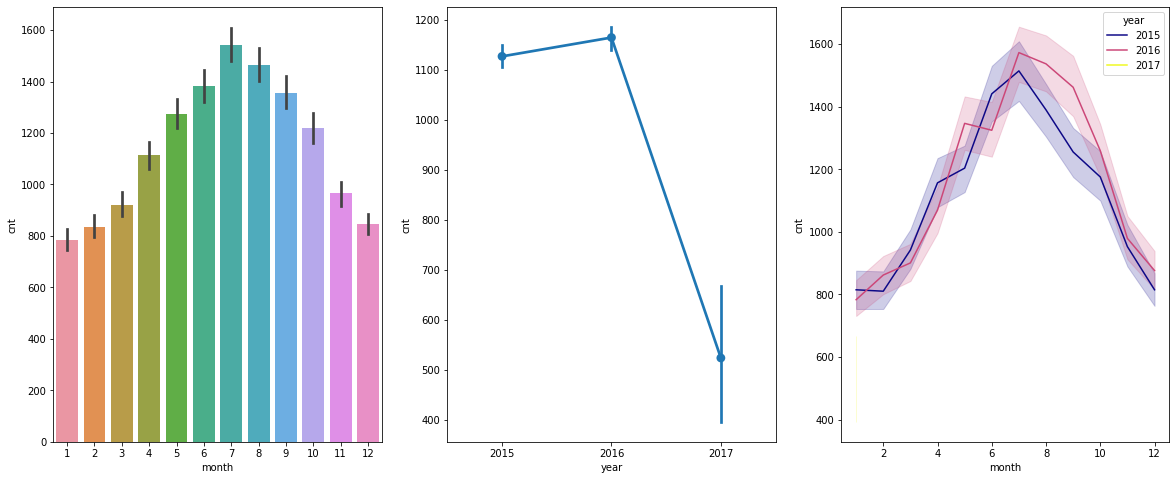

In [32]:
from matplotlib.pyplot import xlabel, ylabel


fig, ax = plt.subplots(1,3 , figsize = (20,8))

#sns.lineplot( x = df["month"] , y = df["cnt"], ax = ax[0][0]);
#sns.pointplot( x = df["month"] , y = df["cnt"], ax = ax[0][1]);
sns.barplot( x = df["month"] , y = df["cnt"], ax = ax[0]);
sns.pointplot( x = df["year"] , y = df["cnt"], ax = ax[1]);
sns.lineplot( x = df["month"] , y = df["cnt"] , hue = df["year"] , palette = "plasma" , ax = ax[2]);
#sns.lineplot( x = df["year"] , y = df["cnt"], ax = ax[1][2]);

<div class="alert alert-warning alert-info">
<span style=" color:red" id="bishhr">7. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [33]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


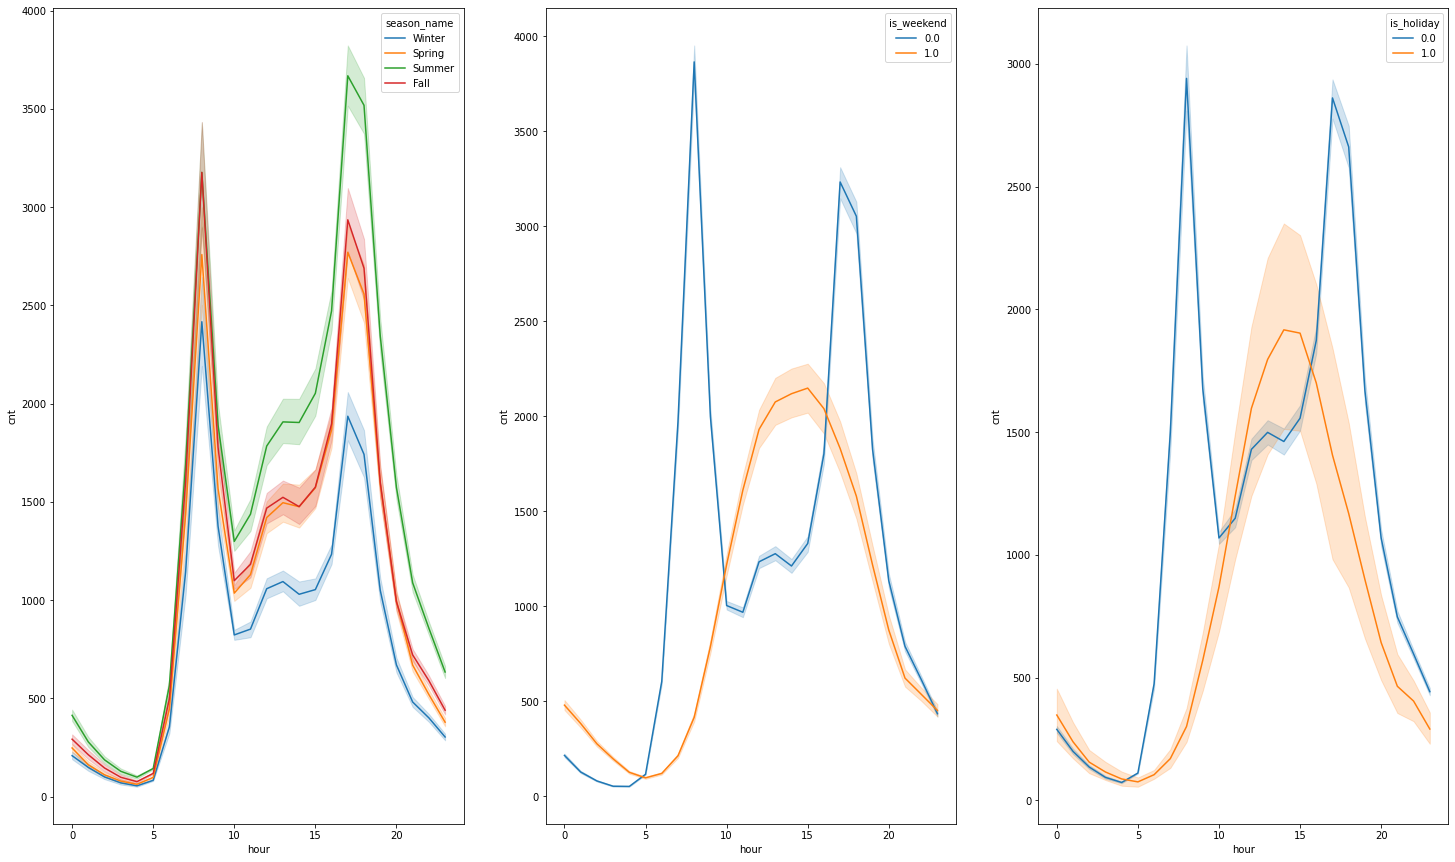

In [34]:
fig, ax = plt.subplots(1,3 , figsize = (25,15))

sns.lineplot(x = df.hour , y = df.cnt , hue = df.season_name , ax = ax[0]);
sns.lineplot(x = df.hour , y = df.cnt , hue = df["is_weekend"] , ax = ax[1]);
sns.lineplot(x = df.hour , y = df.cnt , hue = df["is_holiday"] ,ax = ax[2]);

In [35]:
#fig, ax = plt.subplots(1,3,figsize = (20,14))

#sns.lineplot( x = df["is_holiday"] , y = df["cnt"] , ax = ax[0]);
#sns.lineplot( x = df["is_weekend"] , y = df["cnt"] , ax = ax[1]);
#sns.lineplot( x = df["season_name"] , y = df["cnt"], ax = ax[2]); 

<div class="alert alert-warning alert-info">
<span style=" color:red" id="isholiday"> 8. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

In [36]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


In [37]:
df.groupby("is_holiday")["cnt"].count()

is_holiday
0.0    17030
1.0      384
Name: cnt, dtype: int64

In [38]:
df.groupby("is_holiday")["cnt"].mean()

is_holiday
0.0    1151.525191
1.0     769.526042
Name: cnt, dtype: float64

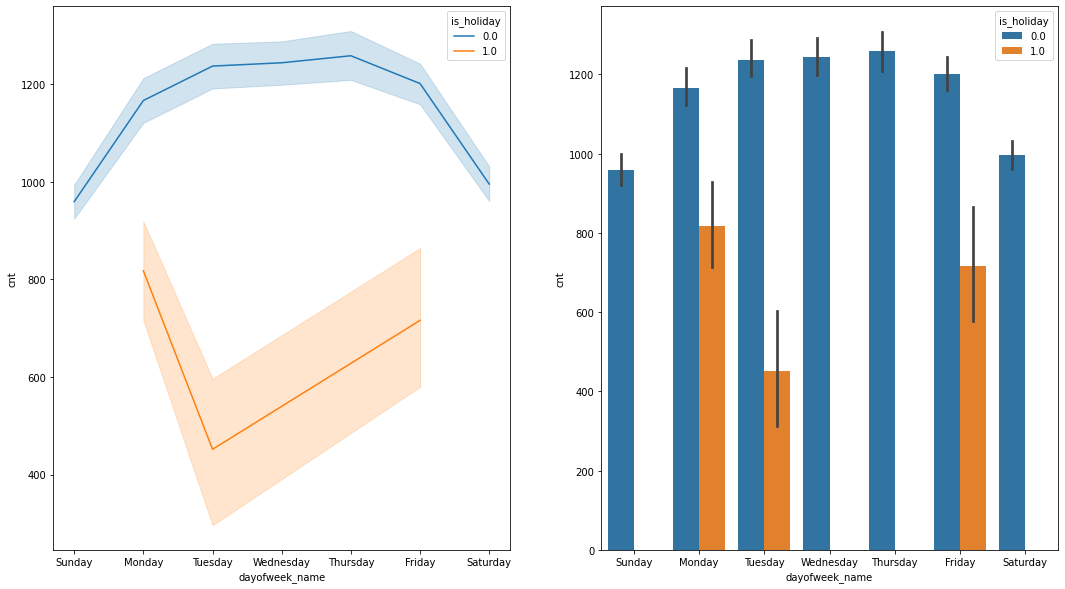

In [39]:
fig, ax = plt.subplots(1,2,figsize = (18,10))

sns.lineplot(x= df["dayofweek_name"] , y= df["cnt"] , hue = df["is_holiday"] , ax = ax[0]);
sns.barplot(x = "dayofweek_name" , y = "cnt" , data = df , hue = "is_holiday" , ax = ax[1]);

<div class="alert alert-warning alert-info">
<span style=" color:red" id="bishdyofamo"> 9. Plot bike shares by day of month
</span>

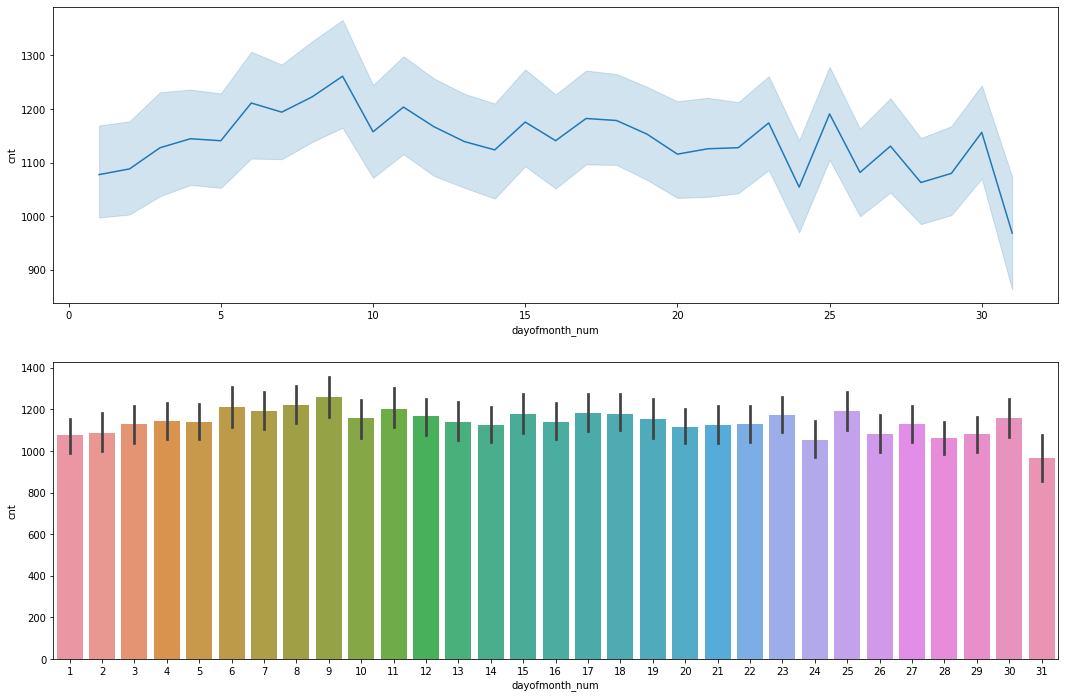

In [40]:
fig, ax = plt.subplots(2,1,figsize = (18,12))


sns.lineplot(x = df["dayofmonth_num"] , y = df["cnt"] , ax = ax[0]);
sns.barplot(x = df["dayofmonth_num"] , y = df.cnt, ax = ax[1] ) ;



<div class="alert alert-warning alert-info">
<span style=" color:red" id="bishbyye"> 10. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

In [41]:
df[df["is_holiday"] == 1]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-04-03 00:00:00,279,8.0,6.0,82.0,10.0,7.0,1.0,0.0,0.0,Spring,2015,4,3,0,4,Friday,3
2015-04-03 01:00:00,174,8.0,5.5,79.0,14.0,7.0,1.0,0.0,0.0,Spring,2015,4,3,1,4,Friday,3
2015-04-03 02:00:00,89,7.5,5.5,84.5,12.0,7.0,1.0,0.0,0.0,Spring,2015,4,3,2,4,Friday,3
2015-04-03 03:00:00,61,7.0,5.0,87.0,11.0,7.0,1.0,0.0,0.0,Spring,2015,4,3,3,4,Friday,3
2015-04-03 04:00:00,46,7.0,6.0,93.0,6.0,7.0,1.0,0.0,0.0,Spring,2015,4,3,4,4,Friday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-02 19:00:00,433,3.0,0.0,81.0,11.0,1.0,1.0,0.0,3.0,Winter,2017,1,2,19,0,Monday,2
2017-01-02 20:00:00,334,3.0,0.0,75.0,13.0,1.0,1.0,0.0,3.0,Winter,2017,1,2,20,0,Monday,2
2017-01-02 21:00:00,233,2.5,-0.5,78.0,11.0,1.0,1.0,0.0,3.0,Winter,2017,1,2,21,0,Monday,2


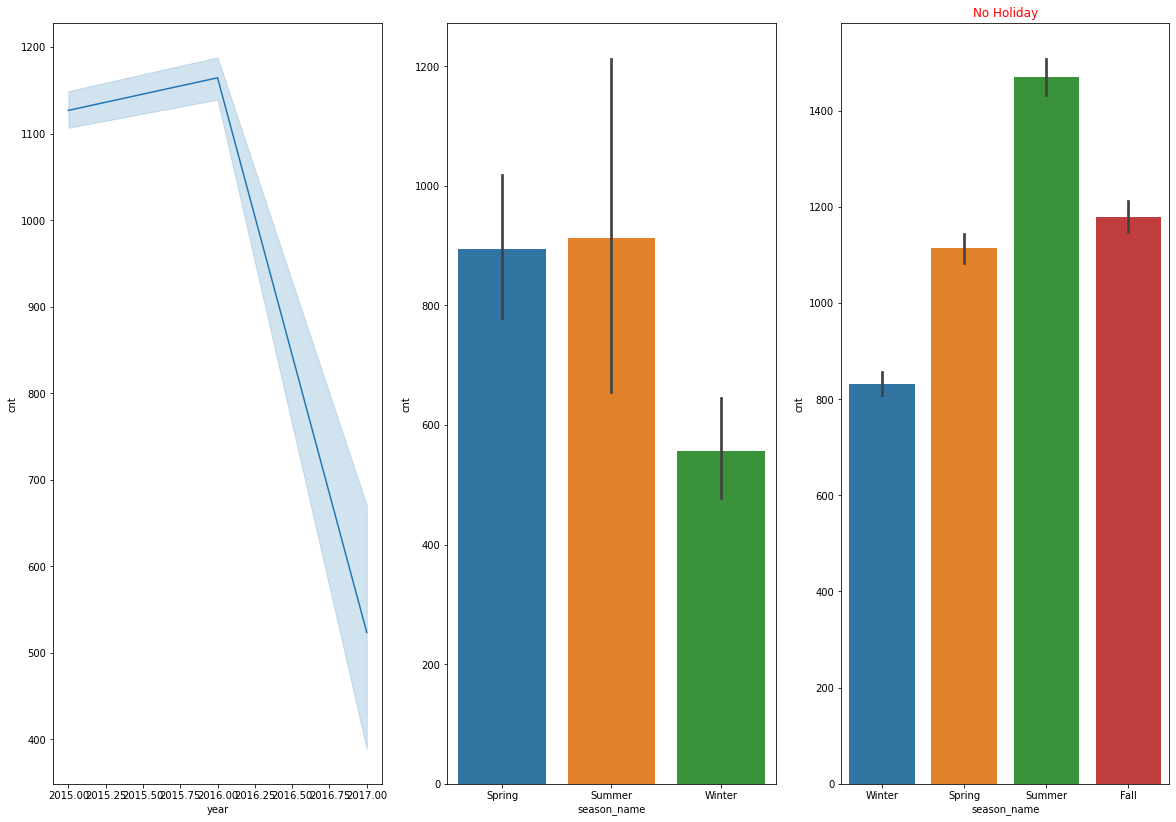

In [42]:
from turtle import title


fig, ax = plt.subplots(1,3, figsize = (20,14))

sns.lineplot(x = df.year , y = df.cnt , ax = ax[0]) ;
sns.barplot(x = df[df["is_holiday"] == 1]["season_name"] , y = df[df["is_holiday"] == 1].cnt , ax = ax[1]) ;
plt.title("No Holiday" , color="red")

sns.barplot(x = df[df["is_holiday"] == 0]["season_name"] , y = df[df["is_holiday"] == 0].cnt , ax = ax[2] ) ;


<div class="alert alert-warning alert-info">
<span style=" color:red" id="distofbs">11. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [43]:
df.groupby("is_weekend").cnt.mean()

is_weekend
0.0    1209.274831
1.0     977.415694
Name: cnt, dtype: float64

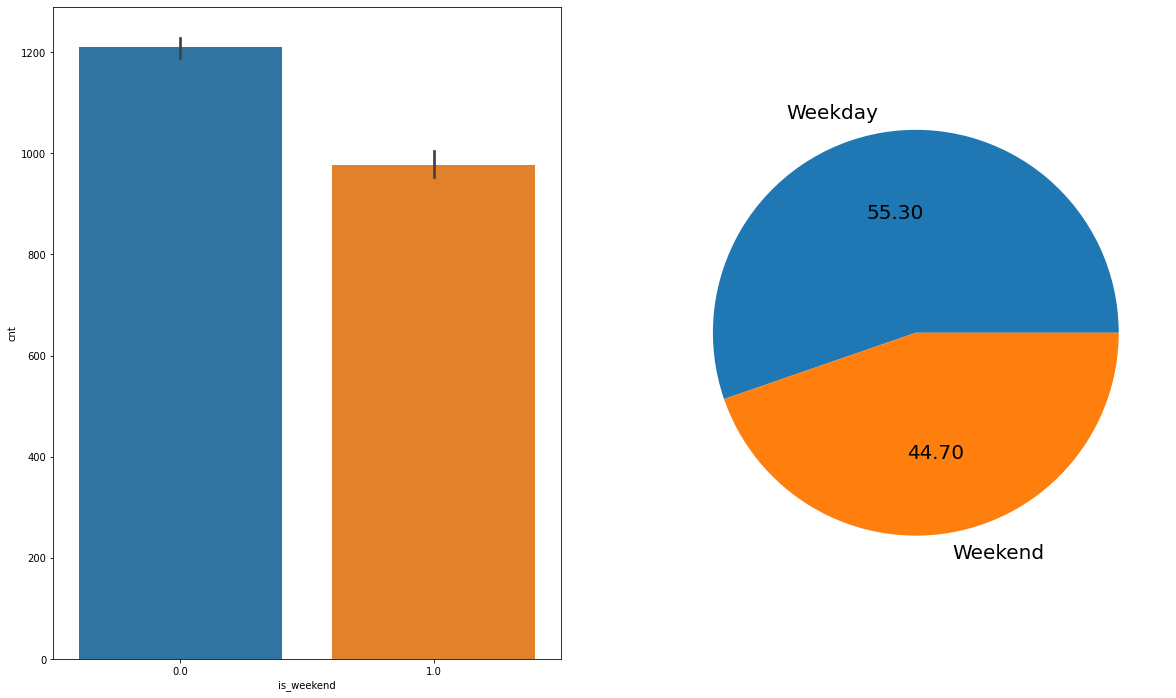

In [44]:
fig, ax = plt.subplots(1,2, figsize = (20,12))

sns.barplot(x = df["is_weekend"] , y = df["cnt"] , ax = ax[0]);
plt.pie(x = df.groupby("is_weekend").cnt.mean(), labels = ["Weekday" , "Weekend"] , autopct= '%.2f' , textprops={'fontsize': 20}) ;


<div class="alert alert-warning alert-info">
<span style=" color:red" id="distofwcs">12. Plot the distribution of weather code by seasons
</span>

In [45]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_name,year,month,day,hour,dayofweek_num,dayofweek_name,dayofmonth_num
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,2015,1,4,0,6,Sunday,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,1,6,Sunday,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,2,6,Sunday,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,2015,1,4,3,6,Sunday,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,2015,1,4,4,6,Sunday,4


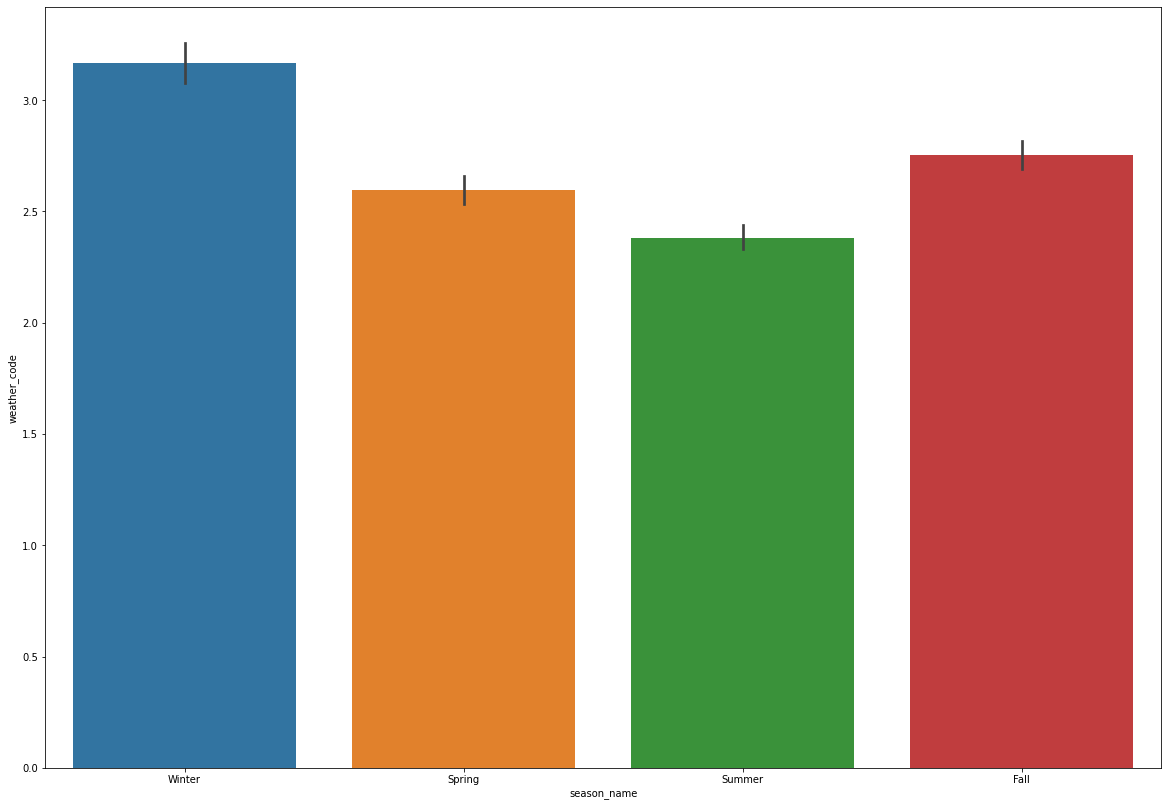

In [46]:
plt.figure(figsize=(20,14))
sns.barplot(x = df["season_name"] , y = df.weather_code ) ;

In [47]:
# Additional

df.weather_code_mapped = df.weather_code.map({
    1:'Clear',
    2:'Few clouds',
    3:'Broken clouds',
    4:'Cloudy',
    7:'Light Rain shower',
    10:'Thunderstorm',
    26:'Snowfall',
    94:'Freezing Fog'
})

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_12080\3093734476.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.weather_code_mapped = df.weather_code.map({


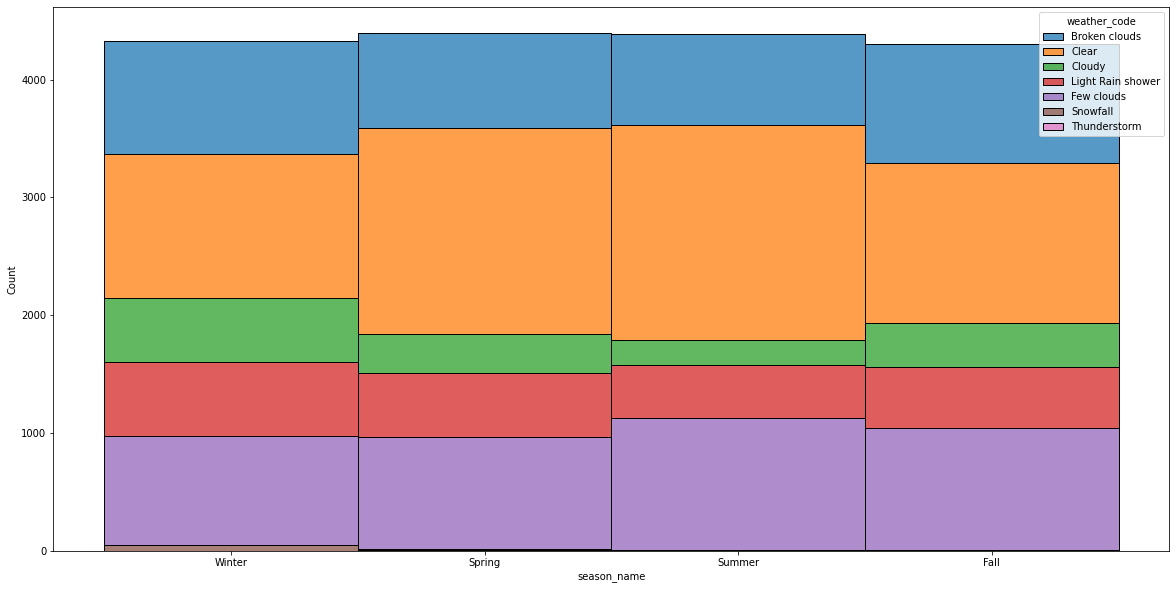

In [48]:
# Additional

plt.figure(figsize=(20, 10))

sns.histplot(binwidth=0.5, x=df.season_name, hue=df.weather_code_mapped, data=df, stat="count", multiple="stack");


<div class="alert alert-info alert-info ">

# <span style=" color:red" id="conclusions">Conclusions
    

    

</span>

- There was totally clear data. No null and no duplicate rows.
- Too many days weather is clear. Freezing Fog never happened. Snowfall sometimes happened. Rain with thunderstorms happened the least.
- As we expect the spring and summer have too many clear days. In the fall and winter have got more Scattered and Broken clouds.
- Bike shares have positive relations with Temperature, Feeling Temperature, Hour and Wind Speed.
- Bike shares have negative relations with humidity, weather status and season.
- As a normally too strong positive correlation between temperature and feeling temperature.
- As a normally positive correlation between Temperature/Feeling Temperature and months.
- As a normally , positive correlation between the hum and seasons. 
- Humidity and weather status have positive realations.
- Humidity and wind speed have negative realations.
- Bike shares is declining but peaked in the summer of 2015
- As a normally , In summers more bike shares happens.
- In all seasons. Early 8-9a.m and 17-18p.m too many bikes shares.
- In weekdays also same eary 8-9a.m and 17.18p.m.
- But in the weekends too many bikes shares around at 14-15p.m and have normal distribution.
- On a holiday, less bike is shared than normal.
- In a normal day(not holiday) summer have too many bike shares. Winter have lest.
- During the holidays, not happened any bike shares in Fall. (This is strange) Winter still lest. Summer and spring almost the same bike shares.
- Seasons have normal weather status. Hard to beautiful ==> Winter>Fall>Spring>Summer

- That's all.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

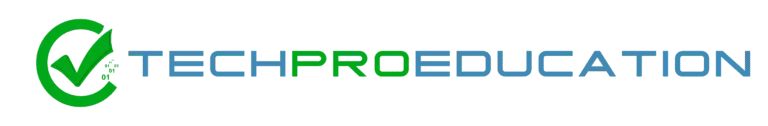